## Quiz 4 - Practice Final Exam

This is the final exam from 2016.  It was originally a 3 hour exam.  We will give you 80 minutes in class -- this should be enough time to get started on the problem and to give you a sense for how you need to pace yourself.  Solutions will be posted on Monday night, once the grading script has stopped at **11:59pm**. Feel free to finish the exam during the day, and compare your answers with the solution key. 

**Instructions** You are encouraged to use any material from the course, such as your own work and class notebooks. You are also free to use standard on-line resources such as Python reference manuals.  You must do all the work on your own, i.e. no consulting with fellow students or with people on-line.  Once you have completed your exam, push your notebook to your BitBucket repository. Store this quiz in **mp248/Quizzes/Quiz.4.ipynb**. 

**This will be graded only as a small task** and it will be graded by a script only, so the grading will be incomplete.  Check your feedback in CourseSpaces to see how your progress is evaluated.

**Final Exam Problem Setup**

We have two billiard balls $A$ and $B$, constrained to move along a frictionless line $x \geq 0$. There is no gravity.  At position $x=0$ is an immovable elastic wall.  Billiard $A$ has mass $m_A$. Billiard $B$ has mass $m_B$.

<img src="F.Q1.Setup.png" /img>

The initial position of billard $A$ is $x=1$. The initial position of billiard $B$ is at $x=2$. 

As the wall is completely elastic, when billiard $A$ collides with the wall, its velocity instantaneously reverses, i.e. $v_A' = - v_A$. *Here the prime indicates the velocity after the collision, not the derivative*. 

When billiard $A$ and $B$ collide, the new velocities of billiards $A$ and $B$ are given by:

$$v_A' = \frac{m_A-m_B}{m_A+m_B}v_A + \frac{2m_B}{m_A+m_B}v_B$$
$$v_B' = \frac{m_B-m_A}{m_A+m_B}v_B + \frac{2m_A}{m_A+m_B}v_A$$

Thus provided $m_B > m_A$ billiard $A$ with undergo a sequence of velocity sign changes as it collides with billiard $B$ and the wall, in succession, until billiard $B$ escapes (to the right) at a larger velocity than billiard $A$. 

**Problem 1:**

Write an algorithm that takes as input the initial velocity of billiard $A$, $B$, and the masses
of billiards $A$ and $B$ respectively.  The output will be a pair $(c_1,c_2)$ where $c_1$ is the number of  collisions billiard $A$ makes with the wall, and $c_2$ is the number of collisions billiard $A$ makes with billiard $B$, before $B$ escapes to the right. 
 
<img src="F.Q1.Context.png" /img>

Note, the radius of the billiards is not relevant for any of the problems in this notebook. 

In [129]:
import matplotlib.pyplot as plt
import sympy as sp

(16, 20)


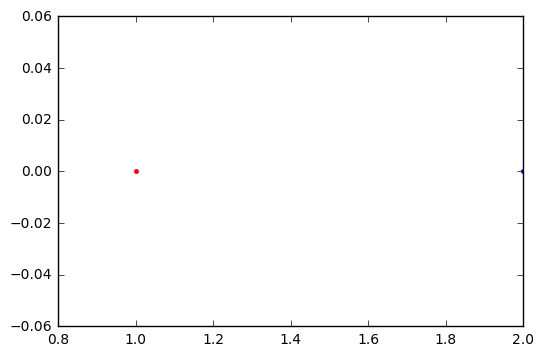

In [211]:
def collide(m1, m2, v1, v2):
    return ((m1-m2)/(m1+m2))*v1 + ((2*m2)/(m1+m2))*v2

# use sympy to solve when equations of motion will be equal to each other
def balls(v_A, v_B, m_a, m_b):
    t, v_a, v_b, x_a, x_b = sp.symbols('t v_a v_b x_a x_b')
    fa = sp.Function('fa')
    fb = sp.Function('fb')
    
    v_a = v_A
    v_b = v_B
    x_a = 1
    x_b = 2
    
    time = 0
    plt.plot(x_a, time, 'r.')
    plt.plot(x_b, time, 'b.')
    
    wall_collisions = 0
    ab_collisions = 0
    
    count = 0
    while True:
        count += 1
        if count > 1000:
            break
        if x_b > x_a:
            if v_b > 0 and v_a > 0 and v_b > v_a:
                return (ab_collisions, wall_collisions)
       
        A = x_a + v_a * t
        B = x_b + v_b * t
        a = sp.lambdify(t, A)
        b = sp.lambdify(t, B)
        
        balls_solution = sp.solve(A-B, t)[0]
        try:
            wall_solution = sp.solve(A, t)[0]
        except IndexError:
            wall_solution = None
        
        if round(balls_solution,4) != 0:
            ab_collisions += 1
            x_a = a(balls_solution)
            x_b = b(balls_solution)
            v_a = collide(v_a, v_b, m_a, m_b)
            v_b = collide(v_b, v_a, m_b, m_a)
        else:
            x_a = a(wall_solution)
            x_b = b(wall_solution)
            wall_collisions += 1
            v_a = -v_a
    
print(balls(0, -1, 1, 10**4))

**Problem 2: **

For $m_A=1$ and $m_B = 10^2, 10^4, 10^6, \cdots $, let the initial velocity of 
billiard $A$ be zero and the initial velocity of billiard $B$ be $-1$. 

Print out: 

    a) The number of collisions of A with the wall. 
    b) The number of collisions of B with A. 
    c) The total number of collisions of all types, i.e. (a)+(b). 

(8, 7)
(16, 20)
None


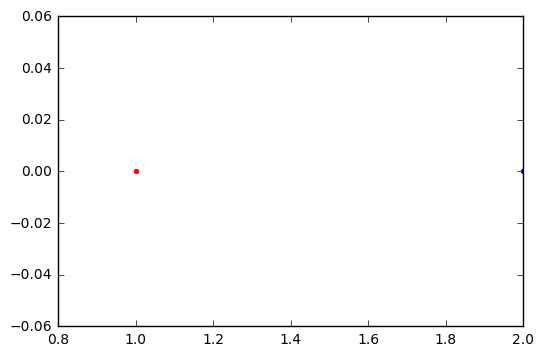

In [212]:
# balls(v_A, v_B, m_A, m_B):
x = balls(0, -1, 1, 10**2)



b = balls(0, -1, 1, 10**4)
c = balls(0, -1, 1, 10**6)

You should begin to see a pattern in your answer to Problem 2. 

**Problem 3: **

Infer a function $f(m_B)$ so that the limit

$$\lim_{m_B \to \infty} \frac{coll(m_B)}{f(m_B)} = L$$

exists, with $L \neq 0$.  

$coll(m_B)$ is the sum of the number of collisions between $A$ and $B$, as well as $A$ and the wall, i.e. the answer to 2(c). 

**Problem 4: **

To demonstrate how quickly $coll(m_B)/f(m_B)$ converges to $L$, create a plot consisting of:

    1) A horizontal line at height L. 
    2) coll(m_B)/f(m_B) for m_B=1, 10, 10^2, 10^3, 10^4, 10^5, 10^6. 

Perhaps your x-coordinate should be $n$ where $m_B=10^n$.  Make the horizontal line (1) a different colour from (2).

**Problem 5:**

Write an algorithm that takes as input any initial masses, positions and initial velocities and outputs a (matplotlib) plot like the one below, which depicts the path both mass $A$ and $B$ take, including all collisions. 

<img src="F.Q1.Context.png" /img>
